## ДЗ Неделя 3


    Решите задачу из прошлой недели методом тяжёлого шарика и ускоренным градиентным методом. 
    
    Сравните сходимость этих методов и градиентного спуска. 

    Нарисуйте один график с тремя линиями, который показывал бы такое сравнение.

    Прокомментируйте результат.

    Проанализируйте влияние параметров методов на их сходимость.

# !WARNING! Из-за плохо написанной функции grad алгоритмы считают очень долго 

In [35]:
import numpy as np
import matplotlib.pyplot as plt

n = 5000
EPSILON = 0.001
LAMBDA = 50
y = np.hstack([np.ones(1000) + 0.1 * np.random.randn(1000),
               5 * np.ones(1000) + 0.1 *np.random.randn(1000),
               -3*np.ones(1000) + 0.1 *np.random.randn(1000),
               -2 * np.ones(1000) + 0.1 *np.random.randn(1000),
               3 * np.ones(1000) + 0.1 *np.random.randn(1000)])
#plt.plot(y)

#### Стартовую точку не меняем для чистоты эксперимента

In [36]:
x0 = np.random.randn(n)

#  GD c alpha=const

In [5]:
def grad(x):
    gradient = np.zeros(len(x))
    for i in range(len(x)):
        if i == 0 : # Частный случай для первого элемента в-ра х
            gradient[i] += ( 2*(x[i]-y[i]) + LAMBDA*( (x[i]-x[i+1]) / np.sqrt(EPSILON**2 + (x[i+1]-x[i])**2 ) ) )
        if i == len(x)-1 : # Частный случай для последнего элемента в-ра х
            gradient[i] += ( 2*(x[i]-y[i]) + LAMBDA*( (x[i]-x[i-1]) / np.sqrt(EPSILON**2 + (x[i]-x[i-1])**2 ) ) )
        else : # Общий случай для всех остальных
            gradient[i] += ( 2*(x[i]-y[i]) + LAMBDA*( ( (x[i]-x[i+1]) / np.sqrt(EPSILON**2 + (x[i+1]-x[i])**2 ) ) + ( (x[i]-x[i-1]) / np.sqrt(EPSILON**2 + (x[i]-x[i-1])**2 ) ) ) )
    return  gradient      


def gradient_descent(grad, x0, maxiter, tol, alpha):
    x = x0.copy()
    conv = [x0.copy()]
    grad_norm = []
    for i in range(maxiter):
        g = grad(x)
        grad_norm.append( np.linalg.norm(g) )
        if np.linalg.norm(g) < tol:
            break
        x = x - alpha * g
        conv.append(x.copy())
    return x, conv , grad_norm

#### Alpha = 0.00005 + maxiter=20000 

In [6]:
tol = 1 
max_iter = 20000 
alpha = 0.000005

x_gd, conv_gd , gradnorm = gradient_descent(grad, x0, max_iter, tol, alpha)

print('Решение: {}'.format(x_gd))
print('Кол-во итераций: {}'.format(len(conv_gd)-1))
print('Длина градиента в последней точке алгоритма : {}'.format( np.linalg.norm(grad(x_gd)) ) )

Решение: [0.07695553 0.07639789 0.07589474 ... 0.5280503  0.52801998 0.52800334]
Кол-во итераций: 20000
Длина градиента в последней точке алгоритма : 373.84790520780814


## Heavy Ball c alpha=const , beta=const

In [18]:
def heavy_ball(grad, x0, maxiter, tol, alpha , beta):
    x = x0.copy()
    conv = [x0.copy()]
    grad_norm = []
    for i in range(maxiter):
        g = grad(x)
        grad_norm.append( np.linalg.norm(g) )
        if i == 0:
            x_old = x    
            x = x - alpha * g
            
        if i != 0:
            if np.linalg.norm(g) < tol:
                break
            heavy_ball = beta*(x-x_old)
            x_old = x
            x = x - (alpha * g) + heavy_ball
            
        conv.append(x.copy())
    return x, conv ,grad_norm

#### Heavy Ball alpha=0.000005 , beta=0.9

In [19]:
alpha = 0.000005
beta = 0.9
maxiter = 20000
tol = 1

In [20]:
hb , history , grad_history = heavy_ball(grad , x0, maxiter, tol, alpha ,beta)

In [21]:
print('Решение: {}'.format(hb))
print('Кол-во итераций: {}'.format(len(history)-1))
print('Длина градиента в последней точке алгоритма : {}'.format( np.linalg.norm(grad(hb)) ) )

Решение: [0.9496321  0.94905748 0.94848203 ... 2.59498961 2.59499869 2.59499967]
Кол-во итераций: 20000
Длина градиента в последней точке алгоритма : 58.87431887967836


# Nesterov's AGD

In [11]:
def AGD(grad, x0, maxiter, alpha , beta):
    x = x0.copy()
    conv = [x0.copy()]
    grad_norm = []
    for i in range(maxiter):
        if i == 0:
            g = grad(x)
            grad_norm.append( np.linalg.norm(g) )
            x_old = x    
            x = x - alpha * g
        if i != 0:
            g = grad(x+beta*(x-x_old))
            grad_norm.append( np.linalg.norm(grad(x)) )
            beta_part = beta*(x-x_old)
            x_old = x
            x = x - (alpha * g) + beta_part
            
        conv.append(x.copy())
    return x, conv ,grad_norm

#### Nesterov's AGD alpha = 0.000005 beta = 0.9

In [32]:
alpha = 0.000005
beta = 0.9
maxiter = 20000

In [33]:
agd , history , agd_grad_history = AGD(grad , x0, maxiter, alpha ,beta)

In [34]:
print('Решение: {}'.format(agd))
print('Кол-во итераций: {}'.format(len(history)-1))
print('Длина градиента в последней точке алгоритма : {}'.format( np.linalg.norm(grad(agd)) ) )

Решение: [0.94960588 0.94903126 0.9484558  ... 2.5949151  2.59492418 2.59492515]
Кол-во итераций: 20000
Длина градиента в последней точке алгоритма : 58.88503182362258


# Сравнение всех трех методов

Text(0, 0.5, 'Длина градиента')

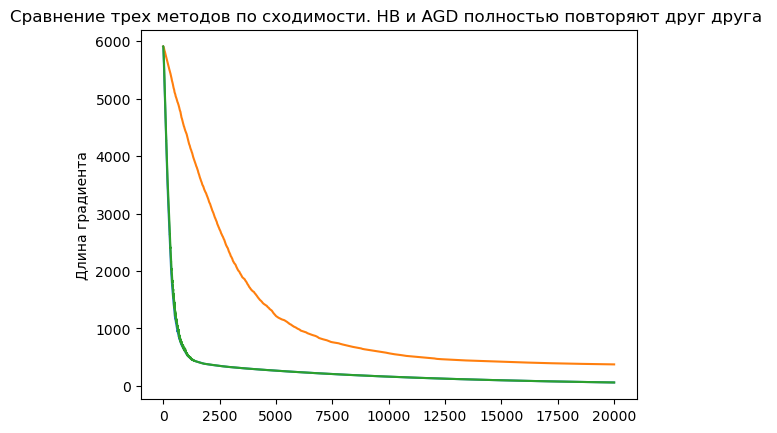

In [24]:
plt.plot(agd_grad_history)
plt.plot(gradnorm)
plt.plot(grad_history)
plt.title('Сравнение трех методов по сходимости. HB и AGD полностью повторяют друг друга ')
plt.ylabel('Длина градиента')

# Вывод :
    С параметрами alpha=0.000005 , beta=0.9 за 20к итераций алгоритмам HB и AGD удалось достичь лучшего
    решения , чем у GD . Кроме того , точность решения превосходит решение CVXPY , однако его преимущество 
    в том , что он делает 5 итераций вместо 20к и его скорость гораздо выше . 

Text(0.5, 1.0, 'Решение GD')

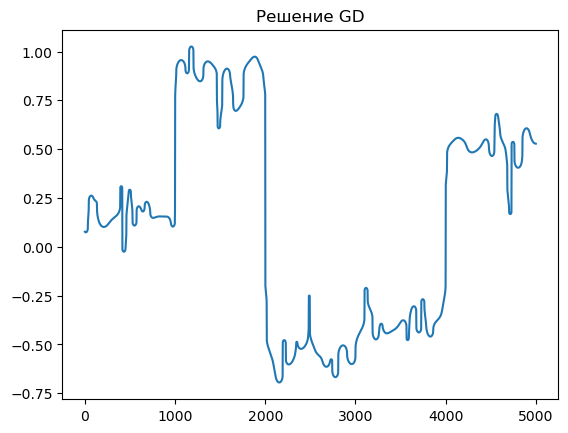

In [26]:
plt.plot(x_gd)
plt.title('Решение GD')

Text(0.5, 1.0, 'Решение HB')

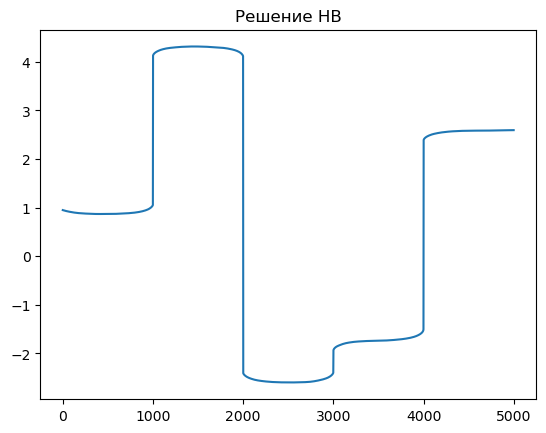

In [27]:
plt.plot(hb)
plt.title('Решение HB')

Text(0.5, 1.0, 'Решение AGD')

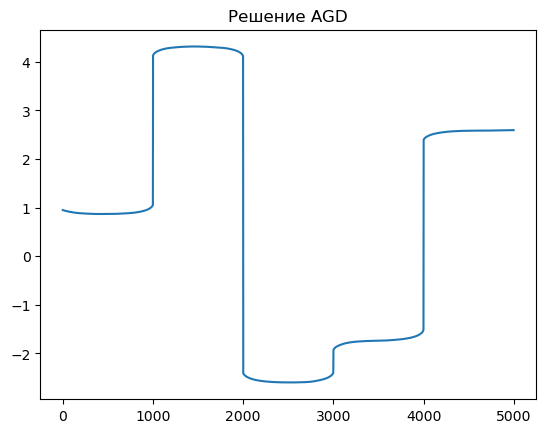

In [28]:
plt.plot(agd)
plt.title('Решение AGD')

# Анализ влияня параметров в моделях

#### 
    Все три модели оказались сильно чувствительными к параметру альфа , при чем настолько , что при 
    переходе с 0.000005 на 0.0005 качество моделей крайне сильно падало , что свидетельствует о том ,
    что алгоритм перескакивает точку минимума . 
    
    К параметру beta модели HB и  AGD тоже оказались довольно чувствительны , он в какой то степени тоже 
    плитяет на длину шага . 